In [3]:
import numpy as np
import pandas as pd
import time
import random
import copy
import math

from IPython import display
import pylab as pl
from tqdm.notebook import tqdm

## Week 1: Karatsuba multiplication & merge sort

### Karatsuba multiplication

Complexity:
- recursive calls: $a=3$ per call
- input size shrinkage $b=2$ (divide by each call)
- combine step $O(n)$ hence $d=1$
- finally $a=3 > b^d=2$ hence $O(n^{\log(3)})$.

In [4]:
def karatsuba_mul(x, y):
    x, y = str(x), str(y)
    n_x, n_y = len(x), len(y)
    if n_x == n_y == 1:
        return int(x) * int(y)
    elif n_x < n_y:
        x = "0" * (n_y - n_x) + x
    elif n_y < n_x:
        y = "0" * (n_x - n_y) + y
    n = len(x)
    mid = n // 2 
    if n % 2 != 0:
        mid += 1
    a, b = int(x[:mid]), int(x[mid:])
    c, d = int(y[:mid]), int(y[mid:])
    ac = karatsuba_mul(a, c)
    bd = karatsuba_mul(b, d)
    k = karatsuba_mul(a + b, c + d) - ac - bd
    return int(str(ac) + "0" * (n - mid) * 2) + int(str(k) + "0" * (n - mid)) + int(bd)

In [5]:
x = 3141592653589793238462643383279502884197169399375105820974944592
y = 2718281828459045235360287471352662497757247093699959574966967627

print(karatsuba_mul(x, y))

8539734222673567065463550869546574495034888535765114961879601127067743044893204848617875072216249073013374895871952806582723184


### Merge sort

Complexity: 
- $6n$ operations per level
- $\log_2(n)$ recursive calls
- Total in time : $6n \log_2(n) + 6n = O(n\log(n))$
- In memory: $O(n)$ as need not in place

In [44]:
def merge_sort(A):

    def merge_sort_(A, l, r):
        if l < r:
            m = (l + r - 1) // 2
            merge_sort_(A, l, m)
            merge_sort_(A, m+1, r)
            combine(A, l, m, r)

    def combine(A, l, m, r):
        n_l = m - l + 1
        n_r = r - m
        L = A[l:m+1]
        R = A[m+1:r+1]
        i, j, k = 0, 0, l
        while i < n_l and j < n_r:
            if L[i] <= R[j]:
                A[k] = L[i]
                i += 1
            else:
                A[k] = R[j]
                j += 1
            k += 1
        while i < n_l:
            A[k] = L[i]
            k += 1
            i += 1
        while j < n_r:
            A[k] = R[j]
            k += 1
            j += 1 
        
    return merge_sort_(A, 0, len(A) - 1)

In [47]:
A = np.loadtxt('countinv.txt').tolist()
merge_sort(A)
# print(A)

## Week 2: Divide and conquer - Inversion algorithm and closest pairs

### Inversions algorithm

Complexity: 
same as merge sort, $O(n\log(n))$ in time and $O(n)$ in memory


In [67]:
def count_inversions(A):
    
    def sort_and_count_inversions(A, l, r):
        if r <= l:
            return 0
        else:
            m = (l + r - 1) // 2
            x = sort_and_count_inversions(A, l, m)
            y = sort_and_count_inversions(A, m+1, r)
            z = combine_and_count_inv_split(A, l, m, r)
        return x + y + z

    def combine_and_count_inv_split(A, l, m, r):
        n_l = m - l + 1
        n_r = r - m
        L = A[l:m+1]
        R = A[m+1:r+1]
        i, j, k = 0, 0, l
        count = 0
        while i < n_l and j < n_r:
            if L[i] <= R[j]:
                A[k] = L[i]
                i += 1
            else:
                A[k] = R[j]
                count += (n_l - i)
                j += 1
            k += 1
        while i < n_l:
            A[k] = L[i]
            k += 1
            i += 1
        while j < n_r:
            A[k] = R[j]
            k += 1
            j += 1 
        return count
    
    return sort_and_count_inversions(A, 0, len(A) - 1)

In [68]:
A = np.loadtxt('countinv.txt').tolist()
# A = [1, 23, 5, 2, 4, 6]
count_inversions(A)

2407905288

### Closest pairs algorithm

Complexity:
- new recursive calls per call $a=2$.
- input size shrinkage $b=2$
- exponent on combine step $O(n)$ hence $d=1$
- Total: $a=b^d$ so $O(n\log(n))$

In [100]:
class closest_pair():
    """ Computes the closest pair of points in P """
    def closest_pair(self, P):
        n = len(P)
        if n <= 3:
            return brute_force_closest_pair(P)
        Px = sorted(P, key=lambda x: x[0])
        Py = sorted(P, key=lambda x: x[1])
        return self.closest_pair_(Px, Py, n)
    
    @staticmethod
    def dist(x, y):
        return np.linalg.norm(x - y) 
    
    def brute_force_closest_pair(self, P):
        n = len(P)
        min_dist = float('inf')
        p, q = None, None
        for i in range(n - 1):
            for j in range(i + 1, n):
                d = self.dist(P[i], P[j])
                if min_dist > d:
                    min_dist = d
                    p, q = (P[i], P[j])
        return p, q, min_dist
    
    def closest_pair_(self, Px, Py, n):
        mid = n // 2
        if n <= 3:
            return self.brute_force_closest_pair(Px)
        Qx = Px[:mid]
        Rx = Px[mid:]
        Qy = []
        Ry = []
        mid_x = Px[mid][0]
        for p in Py:
            if p[0] <= mid_x:
                Qy.append(p)
            else:
                Ry.append(p)
        p1, q1, dist1 = self.closest_pair_(Qx, Qy, mid)
        p2, q2, dist2 = self.closest_pair_(Rx, Ry, n - mid)
        if dist1 <= dist2:
            best_pair = (p1, q1)
            best_dist = dist1
        else:
            best_pair = (p2, q2)
            best_dist = dist2
        p3, q3, dist3 = self.closest_pair_split(Px, Py, mid, best_dist, best_pair)
        return p3, q3, dist3
        
    def closest_pair_split(self, Px, Py, mid, best_dist, best_pair):
        x_bar = Px[mid-1][0]  # biggest x_coord in left of P
        # S_y contains points with x-coord in [x_bar - best_dist, x_bar + best_dist]
        S_y = [p for p in Px if x_bar - best_dist <= p[0] <= x_bar + best_dist]
        n_S_y = len(S_y)
        for i in range(n_S_y - 1):
            for j in range(i+1, min(i + 8, n_S_y)):
                p, q = S_y[i], S_y[j]
                d = self.dist(p, q)
                if d < best_dist:
                    best_dist = d
                    best_pair = (p, q)
        return best_pair[0], best_pair[1], best_dist
                
                

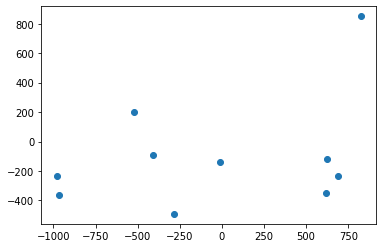

(array([ 622, -117]), array([ 688, -231]), 131.7269904006009)

In [102]:
def test_case(length: int = 10000, size: int = 100):
    lst1 = [random.randint(-size, size) for i in range(length)]
    lst2 = [random.randint(-size, size) for i in range(length)]
    P = np.array(list(zip(Px, Py)))
    return P

P = test_case(length = 10, size = 1000)
# print(P)

import matplotlib.pyplot as plt
plt.scatter(P[:, 0], P[:, 1])
plt.show()

closest_pair(P)

## Week 3: Quick sort

Complexity:
- with first element pivot: averge $O(n\log(n))$, worst case $O(n^2)$
- with median element pivot: always $O(n\log(n))$
- with random pivot: average $O(n\log(n))$
- Memory complexity: $O(1)$ in place 
- sometimes unstable

In [16]:
class QuickSorter():
    def __init__(self, pivot_type = 'median_of_three'):
        self._params = {}
        self.pivot_type = pivot_type
        
    def sort(self, A):
        """ Quicksort initialization and accessible function to the user"""
        self.data = A
        l, r = 0, len(self.data) - 1
        self.count = 0
        self.__quicksort(l, r)
        self.data = None
        return self.count
    
    def __quicksort(self, l, r):
        """ Quicksort algorithm """
        if l < r:
            p_idx = self.__pivot(l=l, r=r)
            p_idx = self.__partition(l, r, p_idx)
            self.count += r - l
            self.__quicksort(l=l, r=p_idx - 1)
            self.__quicksort(l=p_idx + 1, r=r)
    
    def __partition(self, l, r, p_idx):
        """Partition step for quicksort"""
        pivot = self.data[p_idx]
        self.data[p_idx], self.data[l] = self.data[l], self.data[p_idx] 
        i = l + 1
        for j in range(l + 1, r + 1):
            if self.data[j] < pivot:
                self.data[j], self.data[i] = self.data[i], self.data[j]
                i += 1
        self.data[i - 1], self.data[l] = self.data[l], self.data[i - 1]
        return i - 1
    
    @property
    def pivot_type(self):
        return self._params['pivot_type']
    
    @pivot_type.setter
    def pivot_type(self, pivot_type='median_of_3'):
        """ Set pivot type and pivot function """
        if pivot_type == 'median_of_three':
            self.__pivot = self.__median_of_three  # median of three rule for pivot
        elif pivot_type == 'random':
            self.__pivot = self.__random_pivot  # random pivot selection
        elif pivot_type == 'first':
            self.__pivot = self.__first_element  # pivot is fisrt element
        elif pivot_type == 'last':
            self.__pivot = self.__last_element  # pivot is last element
        else:
            raise ValueError("This pivot type does not exist")
        self._params['pivot_type'] = pivot_type
    
    @staticmethod
    def __first_element(l, r):
        """ Pivot selection: lefter element"""
        return l
    
    @staticmethod
    def __last_element(l, r):
        """ Pivot selection: righter element"""
        return r
    
    @staticmethod
    def __random_pivot(l, r):
        """ Pivot selection: random pivot """
        return random.randint(l, r)
    
    def __median_of_three(self, l, r):
        """ pivot selection: median of left, right, and middle elements """
        m = (l + r) // 2
        a = self.data[l]
        b = self.data[m]
        c = self.data[r]
        if (a <= b <= c or c <= b <= a):
            return  m
        if (a <= c <= b or b <= c <= a):
            return r
        return l

In [17]:
pivot_type='last'
q = QuickSorter(pivot_type=pivot_type)
A = np.loadtxt('quicksort.txt').tolist()
# print(A)
print('comparison count when running quisksort with pivot "{}": {}'.format(pivot_type, q.sort(A)))
# print(A)

164123

## Week 4: Linear time selection, mincut problems 

### Linear time selection: random and deterministic selection

In [190]:
class LinearSelection():
    def __init__(self, pivot_type):
        self.params = {}
        self.pivot_type = pivot_type
    
    @property
    def pivot_type(self):
        return self.params['pivot_type']
    
    @pivot_type.setter
    def pivot_type(self, pivot_type):
        """ Set pivot type and pivot function """
        if pivot_type in 'rd':
            self.params['pivot_type'] = pivot_type
        else:
            raise ValueError("This pivot type does not exist")
            
    def linear_selection(self, A, i, pivot_type=None):
        """ Initialization and choose R or D select"""
        self.data = A
        l, r = 0, len(self.data) - 1
        if pivot_type:
            self.pivot_type = pivot_type
        if self.pivot_type == 'r':
            res = self.__R_select(l, r, i)
        if self.pivot_type == 'd':
            res = self.__D_select(l, r, i)
        return res
    
    def __R_select(self, l, r, i):
        """ Randomized Linear selection algorithm """
        if i-1 > r:
            raise KeyError
        elif l == r:
            return A[l]
        elif l < r:
            p_idx = random.randint(l, r - 1)
            p_idx = self.__partition(l, r, p_idx)
            if p_idx == i - 1:
                return A[p_idx]
            elif p_idx > i - 1:
                return self.__R_select(l, p_idx - 1, i)
            else:
                return self.__R_select(p_idx + 1, r, i) 
            
    def __D_select(self, l, r, i):
        """ Deterministic Linear selection algorithm """
#         if i > r:
#             raise KeyError
#         elif l == r:
#             return A[l]
#         elif l < r:
#             n = r - l
#             n_C = n // 5 + n % 5
#             C = [sorted(self.data[i:i+5])[2] for i in range(l, r ,5)]
#             p_idx = self.__D_select(C, None, None)
#             p_idx = self.__partition(l, r, p_idx)
#             if p_idx == i - 1:
#                 return A[p_idx]
#             elif p_idx > i - 1:
#                 return self.__D_selection(l, p_idx - 1, i)
#             else:
#                 return self.__D_selection(p_idx + 1, r, i)
        raise NotImplementedError
            
    def __partition(self, l, r, p_idx):
        """Partition step for linear selection (same as for quicksort) """
        pivot = self.data[p_idx]
        self.data[p_idx], self.data[l] = self.data[l], self.data[p_idx] 
        i = l + 1
        for j in range(l + 1, r + 1):
            if self.data[j] < pivot:
                self.data[j], self.data[i] = self.data[i], self.data[j]
                i += 1
        self.data[i - 1], self.data[l] = self.data[l], self.data[i - 1]
        return i - 1
        
        

In [191]:
l = LinearSelection(pivot_type='r')
A = np.loadtxt('quicksort.txt').tolist()
l.linear_selection(A, 1000)

1000.0

### Mincut problem: Karger's algorithm

In [18]:
def mincut(V, n=None):
    """ uses karger's algorithms n times to try to find the number of crossing edges in the mincut """
    
    def kargers(V):
        while len(V) > 2:
            v1 = random.choice(list(V.keys()))
            v2 = random.choice(V[v1])
            for x in V[v2]:
                if x != v1:
                    V[x].remove(v2)
                    V[x].append(v1)
                    V[v1].append(x)
            while v2 in V[v1]:
                V[v1].remove(v2)
            del V[v2]
        return len(list(V.values())[0])
    
    if not n:
        n = len(V)**2 * int(np.log(len(V)))
    min_crossing = len(V)
    for _ in tqdm(range(n), total=n):
        G = copy.deepcopy(V)
        k = kargers(G)
        min_crossing = min(k, min_crossing)
    return min_crossing
            

In [19]:
V_txt = pd.read_csv('KargerMinCut.txt', delimiter='\t', names=[str(i) for i in range(100)]).values.tolist()
V = {}
for i in range(len(V_txt)):
    vertex = int(V_txt[i][0])
    V[vertex] = [int(x) for x in V_txt[i][1:] if not math.isnan(x)]

In [20]:
min_edges = mincut(V, n=200**2)
print(min_edges)


17
